Saving movies.csv to movies (1).csv
   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Coope

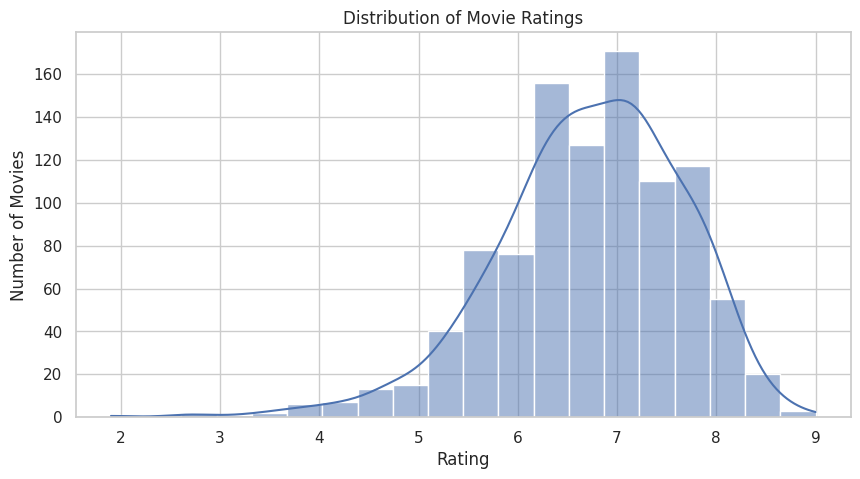

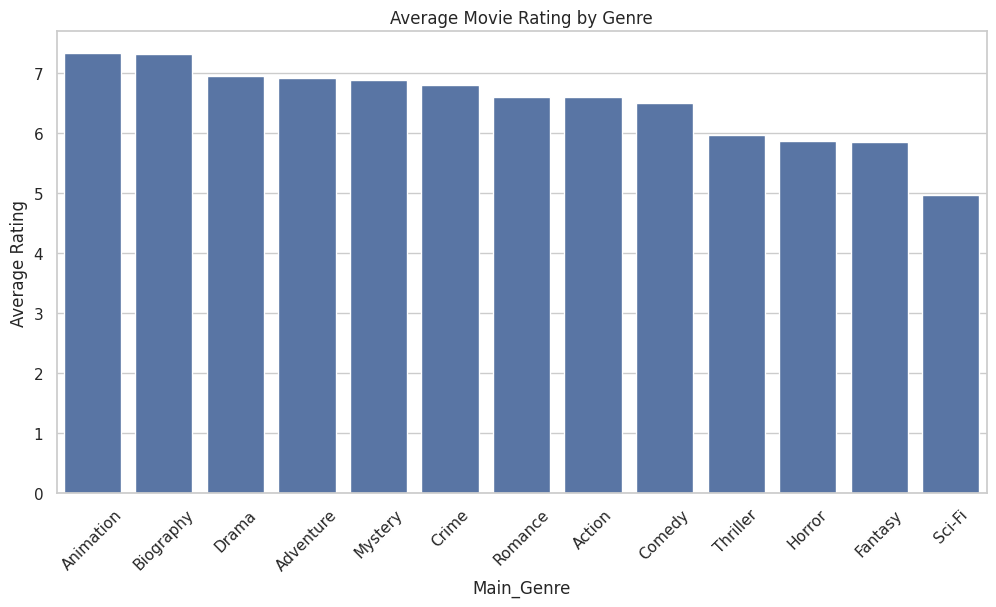

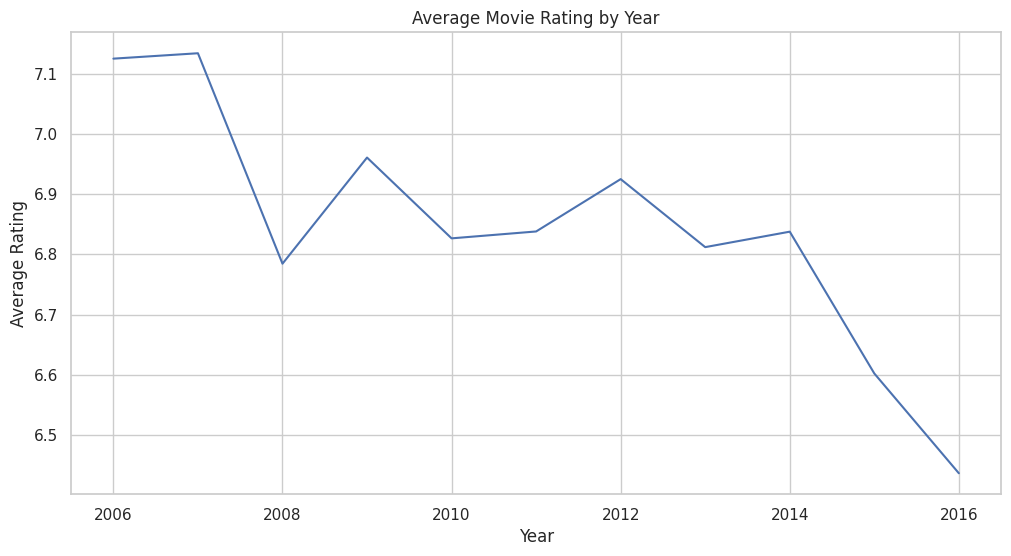

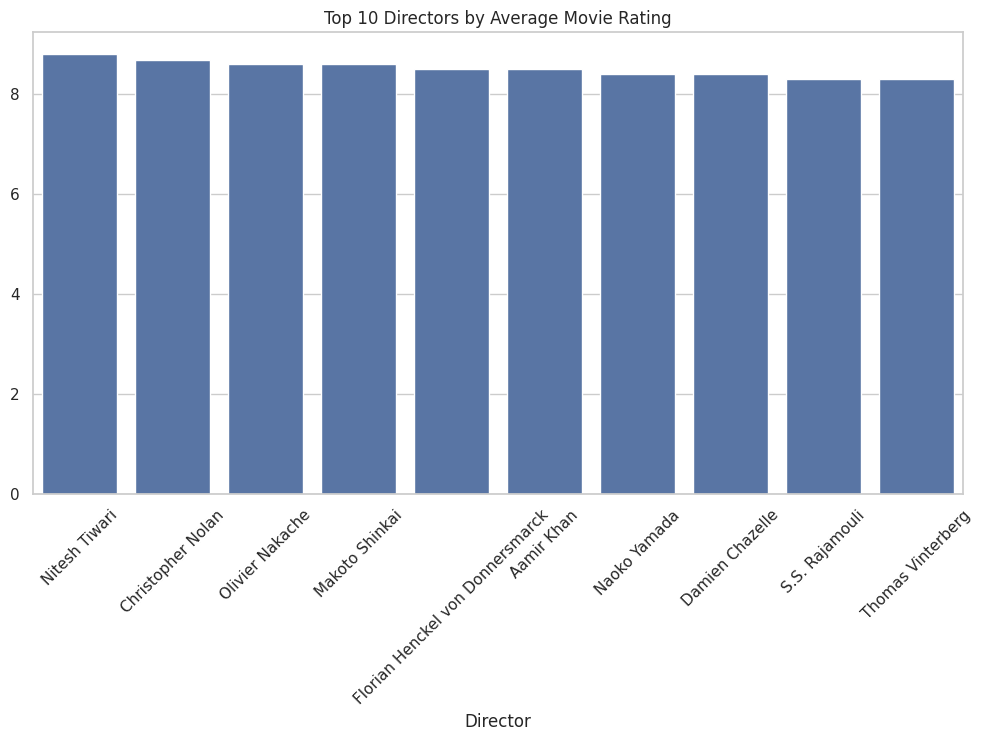

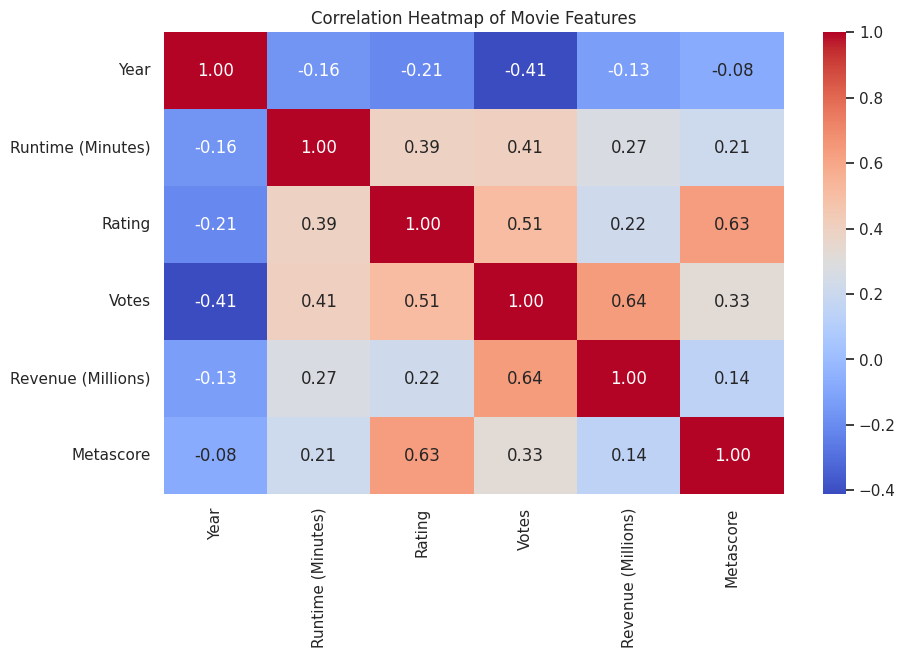

In [8]:
# =======================
# Step 1: Upload CSV File
# =======================
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload from your computer
uploaded = files.upload()

# Load the dataset (make sure you select "movies.csv")
movies = pd.read_csv("movies.csv")

# =======================
# Step 2: Initial Checks
# =======================
print(movies.head())       # Show first 5 rows
print(movies.info())       # Data types and missing values
print(movies.isnull().sum())  # Count missing values

# =======================
# Step 3: Data Cleaning
# =======================
# Drop rows with missing ratings
movies = movies.dropna(subset=['Rating'])

# Convert Year to integer if not already
movies['Year'] = movies['Year'].astype(int)

# Extract main genre (first genre listed if multiple)
movies['Main_Genre'] = movies['Genre'].str.split(',').str[0]

# =======================
# Step 4: Exploratory Data Analysis
# =======================



sns.set(style="whitegrid")

# Ratings Distribution
plt.figure(figsize=(10,5))
sns.histplot(movies['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.show()

# Average Rating by Genre
genre_rating = movies.groupby('Main_Genre')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=genre_rating.index, y=genre_rating.values)
plt.title("Average Movie Rating by Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

# Average Rating by Year
yearly_rating = movies.groupby('Year')['Rating'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_rating.index, y=yearly_rating.values)
plt.title("Average Movie Rating by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

# Top 10 Directors by Average Rating
top_directors = movies.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.title("Top 10 Directors by Average Movie Rating")
plt.xticks(rotation=45)
plt.show()

# ------------------------
# Step 4.5: Top 10 Highest-Rated Movies
# ------------------------
top_movies = movies.sort_values(by='Rating', ascending=False)[['Title', 'Year', 'Main_Genre', 'Director', 'Rating']]
top_movies.head(10)

# ------------------------
# Step 4.6: Correlation Heatmap
# ------------------------
numeric_cols = ['Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']
corr = movies[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Movie Features")
plt.show()


top_movies.head(10).to_csv("top_10_movies.csv", index=False)

# =======================
# Step 5: Save Results
# =======================
# Save cleaned dataset
movies.to_csv("movies_cleaned.csv", index=False)

# Save one visualization (example: genre ratings)
plt.figure(figsize=(12,6))
sns.barplot(x=genre_rating.index, y=genre_rating.values)
plt.title("Average Movie Rating by Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.savefig("rating_by_genre.png")
plt.close()
